## SET UP

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from string import digits
from collections import Counter
from pyvi import ViTokenizer
from gensim.models.word2vec import Word2Vec
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
%matplotlib inline

## DATA AGGREGATION

In [3]:
review_dtmtb = pd.read_csv('reviewData_dtmtb.csv')
review_dtdl = pd.read_csv('reviewData_dtdl.csv')
review_tbkts_pks = pd.read_csv('reviewData_tbkts_pks.csv')

NameError: name 'pd' is not defined

In [4]:
review_data = pd.concat([review_dtmtb, review_dtdl, review_tbkts_pks])

In [4]:
review_data.head()

,id,title,content,thank_count,customer_id,rating,created_at,customer_name,purchased_at
0,17206712,Cực kì hài lòng,"Mình vừa nhận được hàng, máy chạy tốt, pin sạc...",0,20468199,5,1658815564,NaN,NaN
1,17022830,Cực kì hài lòng,giao hàng đúng thời. điện thoại giao đúng mẫu....,3,21886251,5,1657513127,NaN,NaN
2,16990209,Cực kì hài lòng,giao hàng nhanh. đóng gói rất OK. mỗi tội tiếc...,5,14674088,5,1657279289,NaN,NaN
3,16618308,Cực kì hài lòng,Dùng siêu thích máy phiên bản 2022 và cùng năm...,1,14923716,5,1654645068,NaN,NaN
4,17056290,Cực kì hài lòng,cho tiki trading shop 5 sao!shop uy tín! giao ...,0,7966673,5,1657721825,NaN,NaN


In [5]:
review_data.value_counts('rating')

rating
5    92711
4    15936
1     7053
3     4882
2     2319
dtype: int64

In [6]:
review_data['content'].isna().sum()

45167

In [7]:
review_data.dropna(subset=['content'], inplace=True)

In [8]:
review_data['content'].isna().sum()

0

In [9]:
review_dtmtb.value_counts('title')

title
Cực kì hài lòng                                      16757
Hài lòng                                              2057
Rất không hài lòng                                     570
Bình thường                                            400
Không hài lòng                                         193
                                                     ...  
The perfect device to read on the go                     1
Thích                                                   1
Thông tin hàng không đúng                                1
Thất vọng về service giao 2h và hình thức đổi/hủy        1
10/10 về dịch vụ và sản phẩm                             1
Length: 480, dtype: int64

In [10]:
review_data.value_counts('rating')

rating
5    54361
4     9663
1     6990
3     4427
2     2293
dtype: int64

In [11]:
review_data['rating_class'] = review_data['rating'].apply(lambda x: 1 if x>3 else 0 if x==3 else -1)

In [12]:
review_data['rating_class'].value_counts()

 1    64024
-1     9283
 0     4427
Name: rating_class, dtype: int64

In [13]:
rating_data = review_data[['content','rating_class']]
rating_data = rating_data.rename(columns={'rating_class':"class"})
rating_data

,content,class
0,"Mình vừa nhận được hàng, máy chạy tốt, pin sạc...",1
1,giao hàng đúng thời. điện thoại giao đúng mẫu....,1
2,giao hàng nhanh. đóng gói rất OK. mỗi tội tiếc...,1
3,Dùng siêu thích máy phiên bản 2022 và cùng năm...,1
4,cho tiki trading shop 5 sao!shop uy tín! giao ...,1
...,...,...
41460,cực kỳ hài lòng,1
41461,"Sạc pin chỉ full 88%, nhờ shop tư vấn",-1
41462,nhìn rất ok.,1
41463,Giao hang nhah hang dung ok,1


In [14]:
data_train, data_test  = train_test_split(rating_data, test_size=0.2)

In [15]:
data_train.value_counts("class")

class
 1    51175
-1     7440
 0     3572
dtype: int64

In [16]:
data_test.value_counts("class")

class
 1    12849
-1     1843
 0      855
dtype: int64

In [19]:
data_train.to_csv('data_train.csv', index=False)
data_test.to_csv('data_test.csv', index=False)

## DATA PREPARATION

In [2]:
data_train = pd.read_csv('data_train.csv');
data_test = pd.read_csv('data_test.csv');

In [5]:
data_train.value_counts('class')

class
 1    51175
-1     7440
 0     3572
dtype: int64

In [12]:
from sklearn.utils import resample

In [15]:

data_train_1 = data_train[data_train['class'] == 1]
data_train_0 = data_train[data_train['class'] == 0]
data_train_n1 = data_train[data_train['class'] == -1]

data_train_1 = resample(data_train_1, replace=False, n_samples=3000, random_state=1)
data_train_0 = resample(data_train_0, replace=False, n_samples=3000, random_state=2)
data_train_n1 = resample(data_train_n1, replace=False, n_samples=3000, random_state=3)

data_train = pd.concat([data_train_1, data_train_0, data_train_n1])

In [16]:
data_train.value_counts('class')

class
-1    3000
 0    3000
 1    3000
dtype: int64

In [17]:
labels = data_train.iloc[:,1].values
reviews = data_train.iloc[:,0].values

In [18]:
encoded_labels = []
for label in labels:
    if label == -1:
        encoded_labels.append([1,0,0])
    elif label ==0:
        encoded_labels.append([0,1,0])
    else:
        encoded_labels.append([0,0,1])

encoded_labels = np.array(encoded_labels)

In [19]:
encoded_labels

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [20]:
reviews_processed = []
unlabeld_processed = []
for review in reviews:
    review_cool_one = ''.join([char for char in review if char not in digits])
    reviews_processed.append(review_cool_one)
    
print(reviews[0])
print(reviews_processed[0])

Khá hài lòng
Khá hài lòng


In [21]:
word_reviews = []
all_words = []
for review in reviews_processed:
    review = ViTokenizer.tokenize(review.lower())
    word_reviews.append(review.split())

print(word_reviews[0])

['khá', 'hài_lòng']


In [22]:
EMBEDDING_DIM = 400 #how big is each word vector
MAX_VOCAB_SIZE = 10000 #how many unique words to use
MAX_SEQUENCE_LENGTH = 300 #max number of words in a comment to use

In [23]:
#!pip3 install keras --user

In [24]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [25]:
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE, lower = True, char_level = False)
tokenizer.fit_on_texts(word_reviews)
sequences_train = tokenizer.texts_to_sequences(word_reviews)
word_index = tokenizer.word_index

In [27]:
data = pad_sequences(sequences_train, maxlen = MAX_SEQUENCE_LENGTH)
labels = encoded_labels

In [28]:
sub_data = data[:2000]
sub_labels = labels[:2000]

In [29]:
sub_data.shape

(2000, 300)

In [30]:
print('Shape of X train and X validation tensor', data.shape)
print('Shape of label train and validation tensor', labels.shape)

Shape of X train and X validation tensor (9000, 300)
Shape of label train and validation tensor (9000, 3)


In [31]:
vocabulary_size = min(len(word_index) +1, MAX_VOCAB_SIZE)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
# import gensim
# from gensim.models import Word2Vec
# from gensim.utils import simple_preprocess
# from gensim.models.keyedvectors import KeyedVectors

# word_vectors = KeyedVectors.load_word2vec_format('vi-model-CBOW.bin', binary = True)
# vocabulary_size = min(len(word_index) +1, MAX_VOCAB_SIZE)
# embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
# print("Vocab size with <UNK>:", vocabulary_size)

# for word, i in word_index.items():
#     if i>=MAX_VOCAB_SIZE:
#         continue
#     try:
#         embedding_vector = word_vectors[word]
#         embedding_matrix[i] = embedding_vector
#     except KeyError:
#         embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), EMBEDDING_DIM)
        
# del(word_vectors)

# from keras.layers import Embedding
# embedding_layer = Embedding(vocabulary_size, EMBEDDING_DIM, weights = [embedding_matrix],
#                            trainable = True)

## Test data preparation

In [33]:
labels_test = data_test.iloc[:, 1].values
reviews_test = data_test.iloc[:, 0].values

In [34]:
encoded_labels_test = []
for label_test in labels_test:
    if label_test == -1:
        encoded_labels_test.append([1,0,0])
    elif label_test ==0:
        encoded_labels_test.append([0,1,0])
    else:
        encoded_labels_test.append([0,0,1])
        
encoded_labels_test = np.array(encoded_labels_test)

In [35]:
reviews_processed_test = []
unlabeled_processed_test = []
for review_test in reviews_test:
    review_cool_one = ''.join([char for char in review_test if char not in digits])
    reviews_processed_test.append(review_cool_one)

In [36]:
word_reviews_test = []
all_words = []
for review_test in reviews_processed_test:
    review_test = ViTokenizer.tokenize(review_test.lower())
    word_reviews_test.append(review_test.split())

In [37]:
sequences_test = tokenizer.texts_to_sequences(word_reviews_test)
data_test = pad_sequences(sequences_test, maxlen = MAX_SEQUENCE_LENGTH)
labels_test = encoded_labels_test

In [38]:
print('Shape of X train and X validation tencor: ', data_test.shape)
print('Shape of label train and X validation tencor: ', labels_test.shape)

Shape of X train and X validation tencor:  (15547, 300)
Shape of label train and X validation tencor:  (15547, 3)


In [39]:
sub_data_test = data_test[:500]
sub_labels_test = labels_test[:500]

## LSTM

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Flatten, Bidirectional, Layer, Reshape, Input, Permute, Attention
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import backend as K

In [42]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model_LSTM.add(LSTM(128, dropout = 0.1, return_sequences = False))
model_LSTM.add(Dense(10, activation='relu'))
model_LSTM.add(Dense(3, activation='sigmoid'))
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.01)
model_LSTM.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [43]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 400)          4000000   
                                                                 
 lstm (LSTM)                 (None, 128)               270848    
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 4,272,171
Trainable params: 4,272,171
Non-trainable params: 0
_________________________________________________________________


In [44]:
early_stopping = EarlyStopping(monitor = 'loss', min_delta = 0.1, patience = 4, verbose = 1)
callbacks_list = [early_stopping]

In [45]:
history = model_LSTM.fit(data, labels, epochs=100, batch_size=256, callbacks=callbacks_list, verbose = 1,shuffle = True, validation_data=[data_test, labels_test])

Epoch 1/100
36/36 [==============================] - 109s 3s/step - loss: 0.9396 - acc: 0.5286 - val_loss: 0.7625 - val_acc: 0.7324
Epoch 2/100
36/36 [==============================] - 116s 3s/step - loss: 0.6879 - acc: 0.6892 - val_loss: 0.6017 - val_acc: 0.7793
Epoch 3/100
36/36 [==============================] - 120s 3s/step - loss: 0.5566 - acc: 0.7719 - val_loss: 0.5204 - val_acc: 0.8094
Epoch 4/100
36/36 [==============================] - 121s 3s/step - loss: 0.4804 - acc: 0.8131 - val_loss: 0.5182 - val_acc: 0.8141
Epoch 5/100
36/36 [==============================] - 120s 3s/step - loss: 0.4119 - acc: 0.8458 - val_loss: 0.6505 - val_acc: 0.7867
Epoch 6/100
36/36 [==============================] - 121s 3s/step - loss: 0.3761 - acc: 0.8621 - val_loss: 0.5709 - val_acc: 0.8095
Epoch 7/100
36/36 [==============================] - 121s 3s/step - loss: 0.3374 - acc: 0.8822 - val_loss: 0.7174 - val_acc: 0.7683
Epoch 8/100
36/36 [==============================] - 121s 3s/step - loss: 0.

In [115]:
score = model_LSTM.evaluate(data_test, labels_test)

print("%s: %.2f" %(model_CNN_3conv.metrics_names[0], score[0]))
print("%s: %.2f%%" %(model_CNN_3conv.metrics_names[1], score[1]*100))

486/486 [==============================] - 68s 140ms/step - loss: 0.8333 - acc: 0.7731
loss: 0.83
accuracy: 77.31%


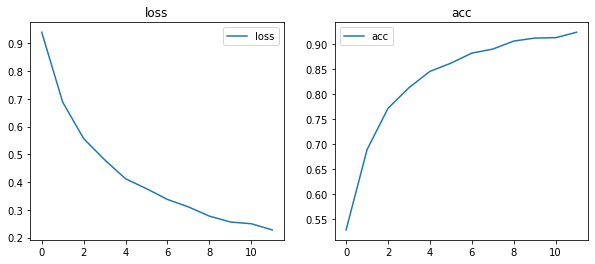

In [46]:
def plot_loss_accuracy(history):
    fig, axs = plt.subplots(1,2, figsize = (10, 4))
    hist = history.history
    for ax, metric in zip(axs, ["loss", "acc"]):
        ax.plot(hist[metric])
        ax.legend([metric])
        ax.set_title(metric)
    plt.style.use('default')
    
plot_loss_accuracy(history)

In [47]:
prediction = model_LSTM.predict(data_test[:10])

labels_text = ['Tiêu cực', 'Bình thường', 'Tích cực']

1/1 [==============================] - 0s 477ms/step


In [48]:
num=2
print(reviews_test[num])
print(labels_text[np.argmax(labels_test[num])])
print(labels_text[np.argmax(prediction[num])])

Hàng chính hãng, tuy nhiên giao hàng vẫn ko đúng hẹn
Tích cực
Tích cực


## Bi-LSTM

In [125]:
model_Bi_LSTM = Sequential()
model_Bi_LSTM.add(Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model_Bi_LSTM.add(Bidirectional(LSTM(128, dropout = 0.1, return_sequences = False)))
model_Bi_LSTM.add(Dense(64, activation='relu'))
model_Bi_LSTM.add(Dense(3, activation='sigmoid'))
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.01)
model_Bi_LSTM.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [126]:
model_Bi_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_65 (Embedding)    (None, 300, 400)          4000000   
                                                                 
 bidirectional_61 (Bidirecti  (None, 256)              541696    
 onal)                                                           
                                                                 
 dense_39 (Dense)            (None, 64)                16448     
                                                                 
 dense_40 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,558,339
Trainable params: 4,558,339
Non-trainable params: 0
_________________________________________________________________


In [127]:
history = model_Bi_LSTM.fit(data, labels, epochs=100, batch_size=256, callbacks=callbacks_list, verbose = 1,shuffle = True, validation_data=[data_test, labels_test])

Epoch 1/100
36/36 [==============================] - 392s 11s/step - loss: 0.9299 - acc: 0.5154 - val_loss: 0.4886 - val_acc: 0.8156
Epoch 2/100
36/36 [==============================] - 414s 12s/step - loss: 0.6661 - acc: 0.6929 - val_loss: 0.6113 - val_acc: 0.7483
Epoch 3/100
36/36 [==============================] - 399s 11s/step - loss: 0.5416 - acc: 0.7763 - val_loss: 0.5267 - val_acc: 0.7857
Epoch 4/100
36/36 [==============================] - 431s 12s/step - loss: 0.4601 - acc: 0.8184 - val_loss: 0.5371 - val_acc: 0.7966
Epoch 5/100
36/36 [==============================] - 423s 12s/step - loss: 0.4019 - acc: 0.8506 - val_loss: 0.7195 - val_acc: 0.7449
Epoch 6/100
36/36 [==============================] - 376s 11s/step - loss: 0.3605 - acc: 0.8701 - val_loss: 0.6033 - val_acc: 0.8022
Epoch 7/100
36/36 [==============================] - 439s 12s/step - loss: 0.3202 - acc: 0.8867 - val_loss: 0.7536 - val_acc: 0.7428
Epoch 8/100
36/36 [==============================] - 440s 12s/step - 

In [128]:
score = model_Bi_LSTM.evaluate(data_test, labels_test)

print("%s: %.2f" %(model_CNN_3conv.metrics_names[0], score[0]))
print("%s: %.2f%%" %(model_CNN_3conv.metrics_names[1], score[1]*100))

486/486 [==============================] - 263s 541ms/step - loss: 0.8266 - acc: 0.7572
loss: 0.83
accuracy: 75.72%


## Bi LSTM Attention

In [52]:
from tensorflow.keras.layers import Concatenate
from keras import regularizers
from keras.models import Model
import keras

In [54]:
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [55]:
sequence_length = sub_data.shape[1]
drop = 0.1

inputs = Input(shape = (sequence_length,))
embedding = Embedding(vocabulary_size, EMBEDDING_DIM, weights = [embedding_matrix])(inputs)
bilstm = Bidirectional(LSTM(128, return_sequences = True))(embedding)
attention_layer = attention()(bilstm)
output = Dense(units = 3, activation = 'softmax')(attention_layer)

model_bi_lstm_att = Model(inputs, output)

In [56]:
# Retrieve the config
config = model_bi_lstm_att.get_config()

# At loading time, register the custom objects with a `custom_object_scope`:
custom_objects = {"attention": attention}
with keras.utils.custom_object_scope(custom_objects):
    new_model_bi_lstm_att = keras.Model.from_config(config)

In [57]:
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
new_model_bi_lstm_att.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
new_model_bi_lstm_att. summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 300, 400)          2869600   
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 256)         541696    
 nal)                                                            
                                                                 
 attention (attention)       (None, 256)               556       
                                                                 
 dense_4 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3,412,623
Trainable params: 3,412,623
Non-trainable params: 0
___________________________________________________

In [59]:
new_model_bi_lstm_att.fit(data, labels,epochs = 100, batch_size = 256, callbacks = callbacks_list, verbose = 1,shuffle = True, validation_data=[data_test, labels_test])

Epoch 1/100
36/36 [==============================] - 320s 9s/step - loss: 1.1017 - accuracy: 0.3560 - val_loss: 1.0618 - val_accuracy: 0.8047
Epoch 2/100
36/36 [==============================] - 325s 9s/step - loss: 0.9940 - accuracy: 0.4988 - val_loss: 0.7593 - val_accuracy: 0.6711
Epoch 3/100
36/36 [==============================] - 331s 9s/step - loss: 0.8365 - accuracy: 0.6057 - val_loss: 0.8184 - val_accuracy: 0.7463
Epoch 4/100
36/36 [==============================] - 333s 9s/step - loss: 0.7561 - accuracy: 0.6699 - val_loss: 0.9470 - val_accuracy: 0.5918
Epoch 5/100
36/36 [==============================] - 331s 9s/step - loss: 0.6536 - accuracy: 0.7267 - val_loss: 0.7007 - val_accuracy: 0.7461
Epoch 6/100
36/36 [==============================] - 336s 9s/step - loss: 0.5401 - accuracy: 0.7873 - val_loss: 0.8877 - val_accuracy: 0.7214
Epoch 7/100
36/36 [==============================] - 335s 9s/step - loss: 0.4682 - accuracy: 0.8220 - val_loss: 0.5709 - val_accuracy: 0.8018
Epoch 

In [116]:
score = new_model_bi_lstm_att.evaluate(data_test, labels_test)

print("%s: %.2f" %(model_CNN_3conv.metrics_names[0], score[0]))
print("%s: %.2f%%" %(model_CNN_3conv.metrics_names[1], score[1]*100))

486/486 [==============================] - 125s 258ms/step - loss: 0.7426 - accuracy: 0.7634
loss: 0.74
accuracy: 76.34%


In [60]:
prediction = new_model_bi_lstm_att.predict(data_test[:10])

labels_text = ['Tiêu cực', 'Bình thường', 'Tích cực']
num=2
print(reviews_test[num])
print(labels_text[np.argmax(labels_test[num])])
print(labels_text[np.argmax(prediction[num])])

1/1 [==============================] - 1s 1s/step
Hàng chính hãng, tuy nhiên giao hàng vẫn ko đúng hẹn
Tích cực
Tích cực


In [123]:
# model_Bi_LSTM_Attention = Sequential()
# model_Bi_LSTM_Attention.add(Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
# model_Bi_LSTM_Attention.add(Bidirectional(LSTM(128, dropout = 0.1, return_sequences = False)))
# model_Bi_LSTM_Attention.add(Attention())
# model_Bi_LSTM_Attention.add(Dense(64, activation='relu'))
# model_Bi_LSTM_Attention.add(Dense(3, activation='softmax'))
# adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.01)
# model_Bi_LSTM_Attention.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

In [124]:
# model_Bi_LSTM_Attention.summary()

In [125]:
# history = model_Bi_LSTM_Attention.fit(sub_data, sub_labels, epochs=100, batch_size=256, callbacks=callbacks_list, verbose = 1,shuffle = True, validation_data=[sub_data_test, sub_labels_test])

## CNN (3 Layer Conv) 

In [62]:

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LayerNormalization

In [122]:
drop = 0.1

inputs = Input(shape = (sequence_length,))
feature = Embedding(vocabulary_size, EMBEDDING_DIM, weights = [embedding_matrix])(inputs)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

combine_feature = GlobalMaxPooling1D()(cnn_feature)
combine_feature = LayerNormalization()(combine_feature)

combine_feature = Dense(16,activation='relu')(combine_feature)
output = Dense(units = 3, activation = 'softmax')(combine_feature)
model_CNN_3conv = Model(inputs, output)
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
model_CNN_3conv.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_CNN_3conv. summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_63 (InputLayer)       [(None, 300)]             0         
                                                                 
 embedding_64 (Embedding)    (None, 300, 400)          2869600   
                                                                 
 conv1d_153 (Conv1D)         (None, 300, 32)           38432     
                                                                 
 max_pooling1d_200 (MaxPooli  (None, 150, 32)          0         
 ng1D)                                                           
                                                                 
 dropout_160 (Dropout)       (None, 150, 32)           0         
                                                                 
 conv1d_154 (Conv1D)         (None, 150, 32)           3104      
                                                          

In [123]:
model_CNN_3conv.fit(data, labels,epochs = 100, batch_size = 256, callbacks = callbacks_list, verbose = 1,shuffle = True, validation_data=[data_test, labels_test])

Epoch 1/100
36/36 [==============================] - 29s 729ms/step - loss: 1.0987 - accuracy: 0.3204 - val_loss: 1.0999 - val_accuracy: 0.1185
Epoch 2/100
36/36 [==============================] - 23s 636ms/step - loss: 1.0986 - accuracy: 0.3251 - val_loss: 1.0974 - val_accuracy: 0.1185
Epoch 3/100
36/36 [==============================] - 23s 640ms/step - loss: 1.0986 - accuracy: 0.3280 - val_loss: 1.0963 - val_accuracy: 0.8265
Epoch 4/100
36/36 [==============================] - 22s 612ms/step - loss: 1.0987 - accuracy: 0.3226 - val_loss: 1.0997 - val_accuracy: 0.0550
Epoch 5/100
36/36 [==============================] - 23s 630ms/step - loss: 1.0986 - accuracy: 0.3208 - val_loss: 1.0979 - val_accuracy: 0.8265
Epoch 5: early stopping


In [124]:
score = model_CNN_3conv.evaluate(data_test, labels_test)

print("%s: %.2f" %(model_CNN_3conv.metrics_names[0], score[0]))
print("%s: %.2f%%" %(model_CNN_3conv.metrics_names[1], score[1]*100))

486/486 [==============================] - 6s 12ms/step - loss: 1.0979 - accuracy: 0.8265
loss: 1.10
accuracy: 82.65%


In [65]:
prediction = model_CNN_3conv.predict(data_test[:10])

labels_text = ['Tiêu cực', 'Bình thường', 'Tích cực']
num=2
print(reviews_test[num])
print(labels_text[np.argmax(labels_test[num])])
print(labels_text[np.argmax(prediction[num])])

1/1 [==============================] - 0s 148ms/step
Hàng chính hãng, tuy nhiên giao hàng vẫn ko đúng hẹn
Tích cực
Tích cực


## CNN (5 Layer Conv)

In [66]:
inputs = Input(shape = (sequence_length,))
feature = Embedding(vocabulary_size, EMBEDDING_DIM, weights = [embedding_matrix])(inputs)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

combine_feature = GlobalMaxPooling1D()(cnn_feature)
combine_feature = LayerNormalization()(combine_feature)

combine_feature = Dense(16,activation='relu')(combine_feature)
output = Dense(units = 3, activation = 'softmax')(combine_feature)
model_CNN_5conv = Model(inputs, output)
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
model_CNN_5conv.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_CNN_5conv. summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 300, 400)          2869600   
                                                                 
 conv1d_3 (Conv1D)           (None, 300, 32)           38432     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 150, 32)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 150, 32)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 150, 32)           3104      
                                                           

In [67]:
model_CNN_5conv.fit(sub_data, sub_labels,epochs = 100, batch_size = 256, callbacks = callbacks_list, verbose = 1,shuffle = True, validation_data=[sub_data_test, sub_labels_test])

Epoch 1/100
8/8 [==============================] - 7s 726ms/step - loss: 1.0941 - accuracy: 0.8720 - val_loss: 1.0909 - val_accuracy: 0.8180
Epoch 2/100
8/8 [==============================] - 5s 695ms/step - loss: 1.0835 - accuracy: 1.0000 - val_loss: 1.0832 - val_accuracy: 0.8180
Epoch 3/100
8/8 [==============================] - 6s 734ms/step - loss: 1.0729 - accuracy: 1.0000 - val_loss: 1.0756 - val_accuracy: 0.8180
Epoch 4/100
8/8 [==============================] - 5s 636ms/step - loss: 1.0624 - accuracy: 1.0000 - val_loss: 1.0681 - val_accuracy: 0.8180
Epoch 5/100
8/8 [==============================] - 5s 667ms/step - loss: 1.0521 - accuracy: 1.0000 - val_loss: 1.0607 - val_accuracy: 0.8180
Epoch 5: early stopping


In [68]:
prediction = model_CNN_5conv.predict(data_test[:10])

labels_text = ['Tiêu cực', 'Bình thường', 'Tích cực']
num=2
print(reviews_test[num])
print(labels_text[np.argmax(labels_test[num])])
print(labels_text[np.argmax(prediction[num])])

1/1 [==============================] - 0s 172ms/step
Hàng chính hãng, tuy nhiên giao hàng vẫn ko đúng hẹn
Tích cực
Tích cực


In [119]:
score = model_CNN_5conv.evaluate(data_test, labels_test)

print("%s: %.2f" %(model_CNN_3conv.metrics_names[0], score[0]))
print("%s: %.2f%%" %(model_CNN_3conv.metrics_names[1], score[1]*100))

486/486 [==============================] - 7s 14ms/step - loss: 1.0600 - accuracy: 0.8265
loss: 1.06
accuracy: 82.65%


## CNN + LSTM 

In [109]:
inputs = Input(shape = (sequence_length,))
initializer = tf.keras.initializers.GlorotNormal()
embedding = Embedding(vocabulary_size, EMBEDDING_DIM, weights = [embedding_matrix],  embeddings_initializer="GlorotNormal")(inputs)
drop=0.4
#CNN

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(embedding)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)

# cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
# cnn_feature = MaxPooling1D()(cnn_feature)
# cnn_feature = Dropout(drop)(cnn_feature)

# cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
# cnn_feature = MaxPooling1D()(cnn_feature)
# cnn_feature = Dropout(drop)(cnn_feature)

cnn_feature = Conv1D(filters=32, kernel_size=3, padding="same", activation="relu")(cnn_feature)
cnn_feature = MaxPooling1D()(cnn_feature)
cnn_feature = LayerNormalization()(cnn_feature)
cnn_feature = Dropout(drop)(cnn_feature)



# #LSTM
bi_lstm_feature = Bidirectional(LSTM(units=32,  dropout=drop, return_sequences = True))(embedding)
bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)

bi_lstm_feature = Bidirectional(LSTM(units=32,  dropout=drop, return_sequences = True))(bi_lstm_feature)
bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)

bi_lstm_feature = Bidirectional(LSTM(units=32,  dropout=drop, return_sequences = True))(bi_lstm_feature)
#bi_lstm_feature = attention()(bi_lstm_feature)
bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
bi_lstm_feature = LayerNormalization()(bi_lstm_feature)

#Combine
combine_feature = tf.keras.layers.Concatenate()([cnn_feature, bi_lstm_feature])
combine_feature = GlobalMaxPooling1D()(combine_feature)
combine_feature = LayerNormalization()(combine_feature)
combine_feature = Dense(16,activation='relu')(combine_feature)

output = Dense(units = 3, activation = 'softmax')(combine_feature)

model_CNN_LSTM = Model(inputs, output)


adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
model_CNN_LSTM.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_CNN_LSTM. summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_61 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 embedding_62 (Embedding)       (None, 300, 400)     2869600     ['input_61[0][0]']               
                                                                                                  
 conv1d_148 (Conv1D)            (None, 300, 32)      38432       ['embedding_62[0][0]']           
                                                                                                  
 max_pooling1d_190 (MaxPooling1  (None, 150, 32)     0           ['conv1d_148[0][0]']             
 D)                                                                                        

In [110]:
model_CNN_LSTM.fit(sub_data, sub_labels,epochs = 100, batch_size = 256, callbacks = callbacks_list, verbose = 1,shuffle = True, validation_data=[sub_data_test, sub_labels_test])

Epoch 1/100
8/8 [==============================] - 60s 6s/step - loss: 1.0941 - accuracy: 0.8720 - val_loss: 1.0909 - val_accuracy: 0.8180
Epoch 2/100
8/8 [==============================] - 45s 6s/step - loss: 1.0835 - accuracy: 1.0000 - val_loss: 1.0832 - val_accuracy: 0.8180
Epoch 3/100
8/8 [==============================] - 46s 6s/step - loss: 1.0729 - accuracy: 1.0000 - val_loss: 1.0756 - val_accuracy: 0.8180
Epoch 4/100
8/8 [==============================] - 46s 6s/step - loss: 1.0624 - accuracy: 1.0000 - val_loss: 1.0681 - val_accuracy: 0.8180
Epoch 5/100
8/8 [==============================] - 46s 6s/step - loss: 1.0521 - accuracy: 1.0000 - val_loss: 1.0607 - val_accuracy: 0.8180
Epoch 5: early stopping


In [121]:
score = model_CNN_LSTM.evaluate(data_test, labels_test)

print("%s: %.2f" %(model_CNN_3conv.metrics_names[0], score[0]))
print("%s: %.2f%%" %(model_CNN_3conv.metrics_names[1], score[1]*100))

486/486 [==============================] - 62s 126ms/step - loss: 1.0600 - accuracy: 0.8265
loss: 1.06
accuracy: 82.65%


In [118]:
prediction = model_CNN_LSTM.predict(data_test[:10])

labels_text = ['Tiêu cực', 'Bình thường', 'Tích cực']
num=2
print(reviews_test[num])
print(labels_text[np.argmax(labels_test[num])])
print(labels_text[np.argmax(prediction[num])])

1/1 [==============================] - 0s 113ms/step
Hàng chính hãng, tuy nhiên giao hàng vẫn ko đúng hẹn
Tích cực
Tích cực
